<a href="https://colab.research.google.com/github/jyotidabass/THresholding_otsu_binary/blob/main/Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BINARY THRESHOLDING

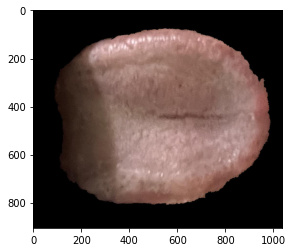

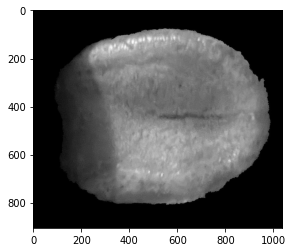

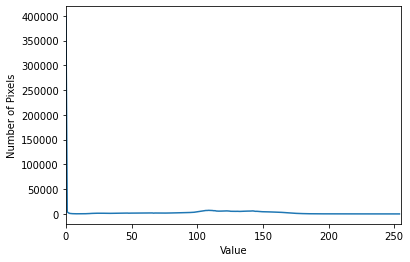

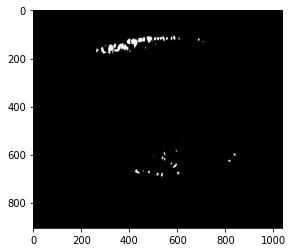

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import sys
from skimage.color import rgb2gray


def binary_threshold(img, threshold):
    """
    Perform binary thresholding.
    :img: the original grayscale image.
    :threshold: the threshold value.
    """

    # Flatten the image.
    flat = np.ndarray.flatten(img)

    # Perform the threshold.
    for i in range(flat.shape[0]):

        if (flat[i] * 255) > threshold:
            flat[i] = 255
        else:
            flat[i] = 0

    # Reshape the image.
    thresh_img = np.reshape(flat, (img.shape[0], img.shape[1]))
  
    return thresh_img

# Load the image.
image_path = '/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg'
img = mpimg.imread(image_path)

# Show the image.
plt.imshow(img, cmap='gray')
plt.show()

# Convert to a grayscale image.
grayscale = rgb2gray(img)

# Show the grayscale image.
plt.imshow(grayscale, cmap='gray')
plt.show()

# Get a histogram for the image.
histogram, bin_edges = np.histogram(grayscale, bins=256, range=(0, 1))

# Show the histogram.
plt.figure()
plt.xlabel("Value")
plt.ylabel("Number of Pixels")
plt.xlim([0.0, 255.0])
plt.plot((bin_edges[0:-1] * 255), histogram)
plt.show()

# Perform Otsu thresholding.
thresh_img = binary_threshold(grayscale, 185)

# Show the thresholded image.
plt.imshow(thresh_img, cmap='gray')
plt.show()

OTSU THRESHOLDING

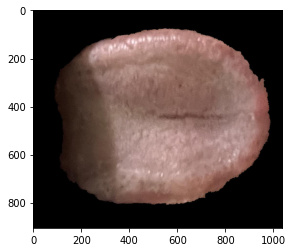

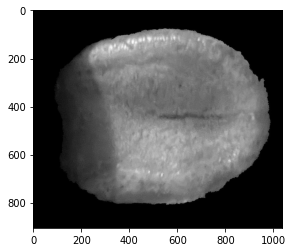

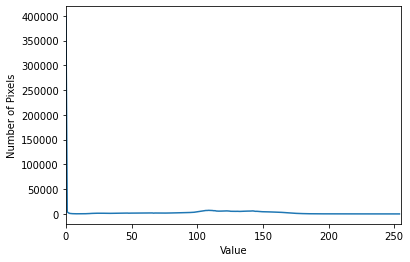

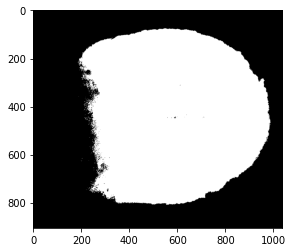

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import sys
from skimage.color import rgb2gray


def get_probabilities(histogram, u, num_pixels):
    """
    Compute the probabilities for Otsu thresholding.
    :histogram: the image histogram.
    :u: the pixel value.
    :num_pixels: the total number of pixels.
    """

    probability = 0

    # Get the sum.
    for i in range(0, u + 1):
        probability += histogram[i]

    # Get the probability.
    probability = probability / num_pixels

    return probability


def get_class_means(histogram, u, num_pixels):
    """
    Compute the class means for Otsu thresholding.
    :histogram: the image histogram.
    :u: the pixel value.
    :num_pixels: the total number of pixels.
    """

    mu_1 = 0
    mu_2 = 0

    # Get the probabilities
    P = get_probabilities(histogram, u, num_pixels)

    # Handle problems with division.
    if P == 0:
        return 0, 1
    if P == 1:
        return 1, 0

    # Get the means.
    for i in range(0, u + 1):
        mu_1 += i * histogram[i] / P
    for i in range(u, 256):
        mu_2 += i * histogram[i] / (1 - P)

    return mu_1, mu_2


def otsu_threshold(img):
    """
    Perform Otsu thresholding.
    :img: the original grayscale image.
    """

    num_pixels = img.shape[0] * img.shape[1]

    increment = 1
    u = increment
    threshold = u
    S_max = 0

    while u < 256:

        # Compute the probabilities and means.
        c_I = get_probabilities(histogram, u, num_pixels)
        mu_1, mu_2 = get_class_means(histogram, u, num_pixels)

        # Compute the variance.
        sigma_b = (c_I) * (1 - c_I) * (mu_1 - mu_2) ** 2

        # Update the threshold.
        if sigma_b > S_max:
            S_max = sigma_b
            threshold = u

        # Go to the next pixel.
        u += increment

    # Flatten the image.
    flat = np.ndarray.flatten(img)

    # Perform the threshold.
    for i in range(flat.shape[0]):

        if (flat[i] * 255) > threshold:
            flat[i] = 255
        else:
            flat[i] = 0

    # Reshape the image.
    thresh_img = np.reshape(flat, (img.shape[0], img.shape[1]))
  
    return thresh_img


# Load the image.
image_path = '/content/cropped-1E6AE7E2-F4F6-4EFC-AFEC-75B6AF988C47 - Abhishek Karekar.jpg'
img = mpimg.imread(image_path)

# Show the image.
plt.imshow(img, cmap='gray')
plt.show()

# Convert to a grayscale image.
grayscale = rgb2gray(img)

# Show the grayscale image.
plt.imshow(grayscale, cmap='gray')
plt.show()

# Get a histogram for the image.
histogram, bin_edges = np.histogram(grayscale, bins=256, range=(0, 1))

# Show the histogram.
plt.figure()
plt.xlabel("Value")
plt.ylabel("Number of Pixels")
plt.xlim([0.0, 255.0])
plt.plot((bin_edges[0:-1] * 255), histogram)
plt.show()

# Perform Otsu thresholding.
thresh_img = otsu_threshold(grayscale)

# Show the thresholded image.
plt.imshow(thresh_img, cmap='gray')
plt.show()